# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [1]:
# If this cell does not work try running `pip install nbformat`

import io
from IPython import nbformat

nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 393


c:\users\martijn.vanmeerten\appdata\local\programs\python\python39\lib\site-packages\IPython\nbformat.py:12: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  warn("The `IPython.nbformat` package has been deprecated since IPython 4.0. "


## Group Number :

## Student 1 
### Name : Martijn van Meerten
### ID : 4387902

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [120]:
# Absolute path to the credit card fraud data
data_path = "C:\\Users\Martijn.vanMeerten\workspace\studie\CDA\Lab1\data_for_student_case.csv"

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re

# Read data
df1 = pd.read_csv(data_path)

# Class label 
df1 = df1.loc[~(df1['simple_journal'] == 'Refused')]
df1.loc[df1['simple_journal'] == 'Chargeback', 'simple_journal'] = 1 #fraud
df1.loc[df1['simple_journal'] == 'Settled', 'simple_journal'] = 0

# Various feature label encoding
card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)

# 4. Date
df1['creationdate'] = pd.to_datetime(df1['creationdate'])
df1['date'] = df1['creationdate'].dt.date

#Encoding, Cleaning the data
df1.loc[df1['cardverificationcodesupplied'].isna(),'cardverificationcodesupplied'] = False
df1.loc[df1['issuercountrycode'].isna(),'issuercountrycode'] = 'ZZ'
df1.loc[df1['shoppercountrycode'].isna(),'shoppercountrycode'] = 'ZZ'

unique_issuer_cc = df1['issuercountrycode'].unique()
unique_shopper_cc = df1['shoppercountrycode'].unique()
both = np.append(unique_issuer_cc, unique_shopper_cc)
df_countrycodes = pd.DataFrame(both)
unique_codes = df_countrycodes[0].unique()
enc = LabelEncoder()
enc.fit(unique_codes)
df1['issuercountrycode'] = enc.transform(df1.issuercountrycode)
df1['shoppercountrycode'] = enc.transform(df1.shoppercountrycode)
def conv(row):
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                     "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                     "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                     "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                     "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                     "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[row['currencycode']]*100)

df1['amount_eur'] = df1.apply(lambda x: conv(x), axis=1)


enc1 = LabelEncoder()
enc1.fit(df1['txvariantcode'])
df1['txvariantcode'] = enc1.transform(df1.txvariantcode)

enc2 = LabelEncoder()
enc2.fit(df1['currencycode'])
df1['currencycode'] = enc2.transform(df1.currencycode)

enc3 = LabelEncoder()
enc3.fit(df1['shopperinteraction'])
df1['shopperinteraction'] = enc3.transform(df1.shopperinteraction)

df1['accountcode'] = df1['accountcode'].apply(lambda x: re.sub('Account','',x))
df1['accountcode_cc'] = 0
df1.loc[(df1['accountcode'] == 'UK'),'accountcode_cc'] = 'GB'
df1.loc[(df1['accountcode'] == 'Mexico'),'accountcode_cc'] = 'MX'
df1.loc[(df1['accountcode'] == 'Sweden'),'accountcode_cc'] = 'SE'
df1.loc[(df1['accountcode'] == 'APAC'),'accountcode_cc'] = 'APAC'

enc4 = LabelEncoder()
enc4.fit(df1['accountcode'])
df1['accountcode'] = enc4.transform(df1.accountcode)

enccc = LabelEncoder()
enccc.fit(df1['accountcode_cc'])
df1['accountcode_cc'] = enccc.transform(df1.accountcode_cc)

enc5 = LabelEncoder()
enc5.fit(df1['cardverificationcodesupplied'])
df1['cardverificationcodesupplied'] = enc5.transform(df1.cardverificationcodesupplied)

df1.loc[df1['mail_id'].str.contains('na',case=False),'mail_id'] = 'email99999'

enc6 = LabelEncoder()
enc6.fit(df1['mail_id'])
df1['mail_id'] = enc6.transform(df1.mail_id)

df1['bookingdate'] = pd.to_datetime(df1['bookingdate'])

df1.loc[df1['cvcresponsecode'] > 2,'cvcresponsecode'] = 3

#Feature Engineering
df1['countries_equal'] = (df1['shoppercountrycode'] == df1['issuercountrycode'])
df1.loc[df1['countries_equal'] == False,'countries_equal'] = 0
df1.loc[df1['countries_equal'] == True,'countries_equal'] = 1

df1['day_of_week'] = df1['creationdate'].dt.dayofweek

df1['hour'] = df1['creationdate'].dt.hour

original_data_df = df1.copy()

keep_cols = [
    "issuercountrycode",
    "txvariantcode",
    "bin",
    "amount",
    "currencycode",
    "shoppercountrycode",
    "shopperinteraction",
    "cardverificationcodesupplied",
    "cvcresponsecode",
    "accountcode",
    "mail_id",
    "ip_id",
    "card_id",
    "accountcode_cc",
    "simple_journal"
]

df1 = df1[keep_cols]

y = df1["simple_journal"].to_numpy().astype(int)
df1.drop(columns="simple_journal", inplace=True)

X = df1.to_numpy().astype(float)


In [ ]:
diffCountryTrue = df1.query('simple_journal==0 and issuercountrycode!=shoppercountrycode').drop('simple_journal',1).shape[0]
trueTotal = df1.query('simple_journal==0').drop('simple_journal',1).shape[0]
diffCountryTrue / trueTotal

df2 = df1[['mail_id','simple_journal']].groupby(['mail_id']).sum()
len(df2.loc[df2['simple_journal'] > 0])
f, (ax) = plt.subplots(1,figsize =(22, 8))
ax = sns.lineplot(x=df2.index,y=df2['simple_journal'])
ax.set(ylabel = "Num Frauds")
plt.show()

In [ ]:
df2 = df1[['hour','simple_journal']].groupby(['hour']).sum()
len(df2.loc[df2['simple_journal'] > 0])
f, (ax) = plt.subplots(1,figsize =(22, 8))
ax = sns.lineplot(x=df2.index,y=df2['simple_journal'])
ax.set(ylabel = "Num Frauds")
plt.show()

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

We plot the mail id against the number of frauds and see that there are several peaks in the data.

## 2. Imbalance task – 1 A4 – Individual

## SMOTE

In [9]:
import random
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

In [14]:
def smote(x_train, y_train, amount_of_smote, k):
    minority_samples = x_train[y_train.astype(bool)]
    nbrs = NearestNeighbors(n_neighbors = k, algorithm='auto').fit(minority_samples)
    distances, indices = nbrs.kneighbors()
    number_of_minority_samples = len(minority_samples)
    if amount_of_smote < 100:
        number_of_minority_samples = (amount_of_smote / 100) * number_of_minority_samples
        amount_of_smote = 100
    
    amount_of_smote = amount_of_smote / 100
    numattrs = np.shape(minority_samples)[1]
    synthetic = []
    
    def populate(amount_smote, i, nnarray):
        nonlocal synthetic
        while amount_smote != 0:
            nn = int(random.random() * k)
            new_sample = [0]*numattrs
            for attr in range(numattrs):
                dif = minority_samples[nnarray[nn]][attr] - minority_samples[i][attr]
                gap = random.random()
                new_sample[attr] = minority_samples[i][attr] + gap * dif
                
            synthetic.append(new_sample)
            amount_smote -= 1
    
    for i in range(number_of_minority_samples):
        populate(amount_of_smote, i, indices[i])
        
    return np.append(x_train, np.array(synthetic), axis=0), np.append(y_train, np.ones(shape=[1, len(synthetic)]))

#mask = np.random.choice([False, True], len(X), p=[0.7, 0.3])
smote_rate = int((len(X[np.invert(y.astype(bool))]) / len(X[y.astype(bool)])-1)) * 100
print(len(X))
X_smote, y_smote = smote(X, y, smote_rate, 5)
print(len(X_smote))
len(y_smote)

237036
473361


473361

### 2a. Print ROC curves

276
276
276
276
276


Text(0, 0.5, 'True positive rate')

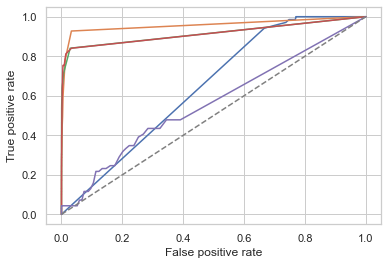

In [42]:
k = 5

n_folds = 5
k_fold = StratifiedKFold(n_splits=n_folds)

for train_index, test_index in k_fold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    smote_rate = int((len(X_train[np.invert(y_train.astype(bool))]) / len(X_train[y_train.astype(bool)])-1)) * 100

    X_train, y_train = smote(X_train, y_train, int((len(X_train[not y_train]) / len(X_train[y_train]) - 1)) * 100, k)

    classifier = RandomForestClassifier(random_state=1)
    classifier.fit(X_train, y_train)

    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], c="gray", linestyle="--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
        


276
276
276
276
276


Text(0, 0.5, 'True positive rate')

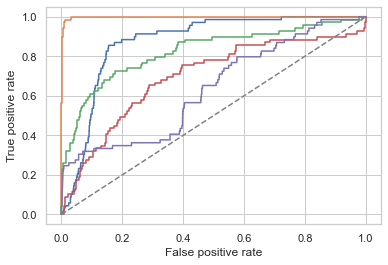

In [46]:
k = 5

n_folds = 5
k_fold = StratifiedKFold(n_splits=n_folds)

for train_index, test_index in k_fold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    smote_rate = int((len(X_train[np.invert(y_train.astype(bool))]) / len(X_train[y_train.astype(bool)])-1)) * 100

    X_train, y_train = smote(X_train, y_train, smote_rate, k)

    classifier = GaussianNB()
    classifier.fit(X_train, y_train)

    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], c="gray", linestyle="--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

Text(0, 0.5, 'True positive rate')

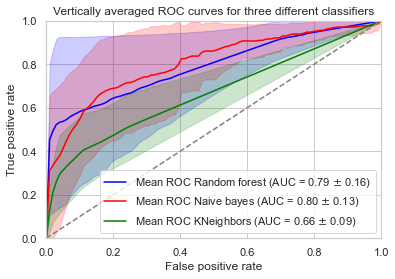

In [15]:
k = 5
n_folds = 5
classifiers = [RandomForestClassifier(random_state=1), GaussianNB(), KNeighborsClassifier()]
colors = ['blue', 'red', 'green']
classifier_names = ['Random forest', 'Naive bayes', 'KNeighbors']

for i in range(3):
    k_fold = StratifiedKFold(n_splits=n_folds)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in k_fold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        smote_rate = int((len(X_train[np.invert(y_train.astype(bool))]) / len(X_train[y_train.astype(bool)])-1)) * 100

        X_train, y_train = smote(X_train, y_train, smote_rate, k)

        #classifier = KNeighborsClassifier()
        classifiers[i].fit(X_train, y_train)

        y_pred_proba = classifiers[i].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, label=r'Mean ROC %s (AUC = %0.2f $\pm$ %0.2f)' % (classifier_names[i], mean_auc, std_auc), color=colors[i])

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=colors[i], alpha=.2)

plt.legend(loc="lower right")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Vertically averaged ROC curves for three different classifiers")
plt.plot([0, 1], [0, 1], c="gray", linestyle="--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

The five resulting ROC curves are vertically average to produce a single line with standard deviation in order to better compare the different classifiers. The resulting plot, however contains large uncertainties and are therefore insufficient for determining the best classifier. It is reasonably likely that the the KNeighbors classifier is outperformed by the other two. Due to the aforementioned reason this is not guaranteed.

### 2c. Is using SMOTE a good idea? Why (not)?

Using SMOTE is a good idea. For the three different classifiers, class imbalance has a large negative influence on the performance of the classifier. Below we compare the ROC curves of the classifiers with SMOTEd data and without. It clearly shows that the AUC of 

Text(0.5, 0.98, 'Vertically averaged ROC curves SMOTE vs no SMOTE')

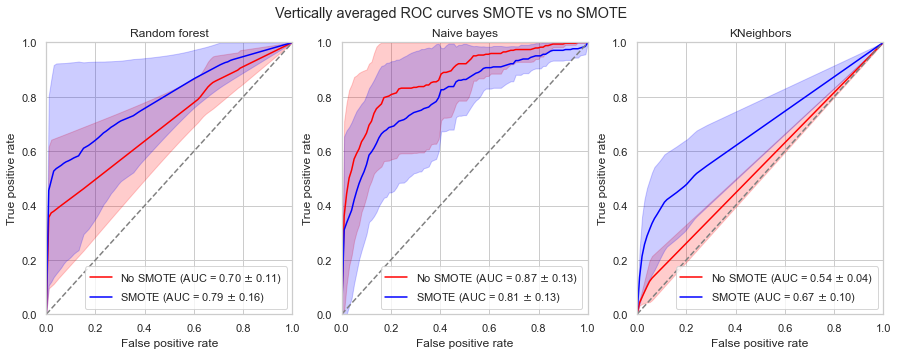

In [22]:
k = 5
n_folds = 5
classifiers = [RandomForestClassifier(random_state=1), GaussianNB(), KNeighborsClassifier()]
SMOTE = ['No SMOTE', 'SMOTE']
colors = ['red', 'blue']
classifier_names = ['Random forest', 'Naive bayes', 'KNeighbors']

fig, axs = plt.subplots(1, 3, figsize=(17,5))
for i in range(3):
    for j in range(2):
        k_fold = StratifiedKFold(n_splits=n_folds)

        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for train_index, test_index in k_fold.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            if j==1:
                smote_rate = int((len(X_train[np.invert(y_train.astype(bool))]) / len(X_train[y_train.astype(bool)])-1)) * 100
                X_train, y_train = smote(X_train, y_train, smote_rate, k)

            #classifier = KNeighborsClassifier()
            classifiers[i].fit(X_train, y_train)

            y_pred_proba = classifiers[i].predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(roc_auc)
            #plt.plot(fpr, tpr)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        axs[i].plot(mean_fpr, mean_tpr, label=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (SMOTE[j], mean_auc, std_auc), color=colors[j])

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        axs[i].fill_between(mean_fpr, tprs_lower, tprs_upper, color=colors[j], alpha=.2)

    axs[i].legend(loc="lower right")
    axs[i].set(xlim=[0, 1], ylim=[0, 1], title=classifier_names[i], xlabel="False positive rate", ylabel="True positive rate")
    axs[i].plot([0, 1], [0, 1], c="gray", linestyle="--")
    
fig.suptitle('Vertically averaged ROC curves SMOTE vs no SMOTE')


## 3. Privacy task – 1 A4 – Individual

### Preprocessing

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### Preprocessing

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import re

# Read data
data_df = pd.read_csv(data_path)

original_data_df = data_df.copy()

# Columns to keep in the data
keep_cols = [
    "issuercountrycode",
    "txvariantcode",
    "bin",
    "amount",
    "currencycode",
    "shoppercountrycode",
    "shopperinteraction",
    "cardverificationcodesupplied",
    "cvcresponsecode",
    "accountcode",
    "creationdate",
    "mail_id",
    "ip_id",
    "card_id",
    "simple_journal"
]

df1 = data_df[keep_cols]

# Class label
df1 = df1.loc[~(df1['simple_journal'] == 'Refused')]
df1.loc[df1['simple_journal'] == 'Chargeback', 'simple_journal'] = 1 #fraud
df1.loc[df1['simple_journal'] == 'Settled', 'simple_journal'] = 0

# Data cleanup
df1.loc[df1['cardverificationcodesupplied'].isna(),'cardverificationcodesupplied'] = False
df1.loc[df1['issuercountrycode'].isna(),'issuercountrycode'] = 'ZZ'
df1.loc[df1['shoppercountrycode'].isna(),'shoppercountrycode'] = 'ZZ'

# Add column with amounts in euro
def conv(row):
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                     "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                     "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                     "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                     "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                     "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[row['currencycode']]*100)

df1['amount_eur'] = df1.apply(lambda x: conv(x), axis=1)

# One hot encode selected columns
one_hot_encode_cols = [
    "currencycode", 
    "shopperinteraction",
    "accountcode",
    "txvariantcode",
    "issuercountrycode",
    "shoppercountrycode"
]

df1 = pd.get_dummies(df1, columns=one_hot_encode_cols)

# Ordinally encode responsecode
df1.loc[df1['cvcresponsecode'] > 2,'cvcresponsecode'] = 3
df1.loc[df1['cvcresponsecode'] == 0, 'cvcresponsecode'] = 4
df1.loc[df1['cvcresponsecode'] == 1, 'cvcresponsecode'] = 0
df1.loc[df1['cvcresponsecode'] == 2, 'cvcresponsecode'] = 1
df1.loc[df1['cvcresponsecode'] == 4, 'cvcresponsecode'] = 2

# Ordinally encode country codes
#unique_issuer_cc = df1['issuercountrycode'].unique()
#unique_shopper_cc = df1['shoppercountrycode'].unique()
#both = np.append(unique_issuer_cc, unique_shopper_cc)
#df_countrycodes = pd.DataFrame(both)
#unique_codes = df_countrycodes[0].unique()
#enc = LabelEncoder()
#enc.fit(unique_codes)
#df1['issuercountrycode'] = enc.transform(df1.issuercountrycode)
#df1['shoppercountrycode'] = enc.transform(df1.shoppercountrycode)

# Various other encodings
bin_enc = LabelEncoder()
bin_enc.fit(df1['bin'])
df1['bin'] = bin_enc.transform(df1.bin)

card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)

df1.loc[df1['mail_id'].str.contains('na',case=False),'mail_id'] = 'email99999'
mail_enc = LabelEncoder()
mail_enc.fit(df1['mail_id'])
df1['mail_id'] = mail_enc.transform(df1.mail_id)

# Pre-processing the creationdate to be used by the classifier
df1['creationdate'] = pd.to_datetime(df1['creationdate'])
df1['creation_month'] = df1['creationdate'].dt.month
df1['creation_week'] = df1['creationdate'].dt.isocalendar().week
df1['creation_day'] = df1['creationdate'].dt.day
df1['creation_hour'] = df1['creationdate'].dt.hour
df1['creation_minute'] = df1['creationdate'].dt.minute
df1['creation_dayofweek'] = df1['creationdate'].dt.dayofweek

# Get target
y = df1["simple_journal"].to_numpy().astype(int)
df1.drop(columns=["simple_journal", "creationdate"], inplace=True)

X = df1.to_numpy().astype(float)
scaler = StandardScaler()
#X = scaler.fit_transform(X)

X


array([[1.998e+03, 6.480e+04, 1.000e+00, ..., 2.300e+01, 3.000e+00,
        2.000e+00],
       [2.364e+03, 4.490e+04, 1.000e+00, ..., 4.000e+00, 5.000e+01,
        3.000e+00],
       [1.965e+03, 1.499e+05, 1.000e+00, ..., 1.400e+01, 3.000e+01,
        3.000e+00],
       ...,
       [7.840e+02, 5.250e+04, 1.000e+00, ..., 2.300e+01, 4.100e+01,
        5.000e+00],
       [2.508e+03, 8.770e+04, 1.000e+00, ..., 2.300e+01, 5.000e+01,
        5.000e+00],
       [2.508e+03, 5.850e+04, 1.000e+00, ..., 2.300e+01, 5.500e+01,
        5.000e+00]])

### Classification

In [159]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

n_folds = 10
k = 8
k_fold = StratifiedKFold(n_splits=n_folds)
y_predictions = np.zeros(len(y))
y_index_arrays = []
for train_index, test_index in k_fold.split(X, y):
    print("New fold")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    smote = SMOTE(random_state=1, k_neighbors=k, sampling_strategy=1)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    classifier = RandomForestClassifier(random_stat)
    classifier.fit(X_train, y_train)

    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    y_predictions[test_index] = y_pred_proba
    y_index_arrays.append(test_index)
    
print(y_predictions)
print(y_index_arrays)

New fold
New fold
New fold
New fold
New fold
New fold
New fold
New fold
New fold
New fold
[0.0599082  0.24249726 0.99980366 ... 0.08380171 0.76980989 0.27036862]
[array([    0,     1,     2, ..., 23945, 23946, 23947]), array([   35,    36,    37, ..., 47650, 47651, 47652]), array([   70,    71,    72, ..., 71319, 71320, 71321]), array([  105,   106,   107, ..., 94988, 94989, 94990]), array([   140,    141,    142, ..., 118657, 118658, 118659]), array([ 10176,  10177,  10178, ..., 142327, 142328, 142329]), array([ 10210,  10211,  10212, ..., 165996, 165997, 165998]), array([ 10244,  10245,  10246, ..., 189665, 189666, 189667]), array([ 10278,  10279,  37427, ..., 213334, 213335, 213336]), array([ 37459,  37460,  37461, ..., 237033, 237034, 237035])]


### 4a. Print relevant plots and metrics with clear headings.

#### True positives and false positives for optimal threshold

In [161]:
original_data_df['txvariantcode'].unique().size

def tp_fp(y_prediction_probabilities, y, threshold):
    y_pred = np.where(y_prediction_probabilities > threshold, 1, 0)
    true_positive_count = sum(a == 1 and b == 1 for a, b in zip(y_pred, y))
    false_positive_count = sum(a == 1 and b == 0 for a, b in zip(y_pred, y))
    print(true_positive_count)
    print(false_positive_count)
    
tp_fp(y_predictions, y, 0.98)

104
9344


#### Precision, recall, fscore

In [163]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def precision_recall_fscore(y, y_pred, average):
    precision = precision_score(y, y_pred, average=average)
    recall = recall_score(y, y_pred, average=average)
    fscore = f1_score(y, y_pred, average=average)
    return (precision, recall, fscore)

precision_recall_fscore(y, np.where(y_predictions > 0.98, 1, 0), 'binary')
    

(0.01100762066045724, 0.30144927536231886, 0.021239660982334322)

#### Roc curves for the 10 folds

237036
237036


Text(0, 0.5, 'True positive rate')

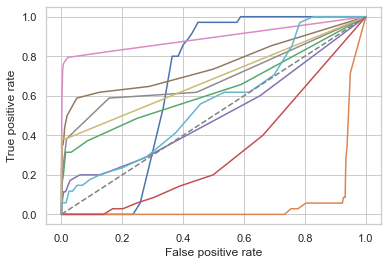

In [108]:
print(len(y_predictions))
print(len(y))

for test_index in y_index_arrays:
    y_pred = y_predictions[test_index]
    y_test = y[test_index]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], c="gray", linestyle="--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

### Pre-processing
Before training any classifier, the data needs to be processed in order for the classifier to work. We remove several columns that can be considered cheating or columns that provide no apparent meaning to the classifier. 
- bookingdate: We remove bookingdate as keeping this information gives the classifier information that it will not have in a real-world situation. The bookingdate is only applied after determining whether a transaction is fraudulent. Bookingdates for chargeback transactions are much later than creation date, while for settled transactions this is only a few days.
- txid: We remove txid, because it is very simple to determine simple_journal value from this data. The different values of simple_journal are clustered around consecutive txids. Therefore, the classifier will use this information to easily determine simple_journal, which is unrealistic in a real-world scenario.
- simple_journal=refused: We remove all transactions that are refused, because transactions with this value can be either fraudulent or not fraudulent. Assigning this data to either category will reduce the quality of the dataset, because it will include points from the opposite classification, causing the classifier to train on wrong data.

The categorical features of the dataset need to be encoded in order to be used by the classifiers. Below we give our motivation for the type of encoding used for each feature.
- currencycode, shopperinteraction, accountcode, txvariantcode: One-hot encoding because there is no natural ordering in countries and currencies and the number of unique values is small
- issuercountrycode, shoppercountrycode, ip_id, card_id, mail_id: ordinal encoding because even though there is no natural ordering in the values, the number of unique values is large and would therefore explode the number of features. issuercountrycode and shoppercountrycode have the same values and therefore take the same encoding.
- cvcresponsecode: ordinal encoding because the values have natural ordering. From least probability of fraud to most (1 -> 0 -> 3-6 -> 2)

The creationdate values are transformed into miliseconds, because the classifier cannot handle pure dates.


## 5. Bonus task – 1 A4

### 5a. Provide code and report below